## Time series augmentation - stretch

In [1]:
# TSPredIT
# version 1.0.727

source("https://raw.githubusercontent.com/cefet-rj-dal/tspredit-examples/main/jupyter.R")

#loading TSPredIT
load_library("daltoolbox") 
load_library("tspredit") 

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Loading required package: tspredit



### Series for studying

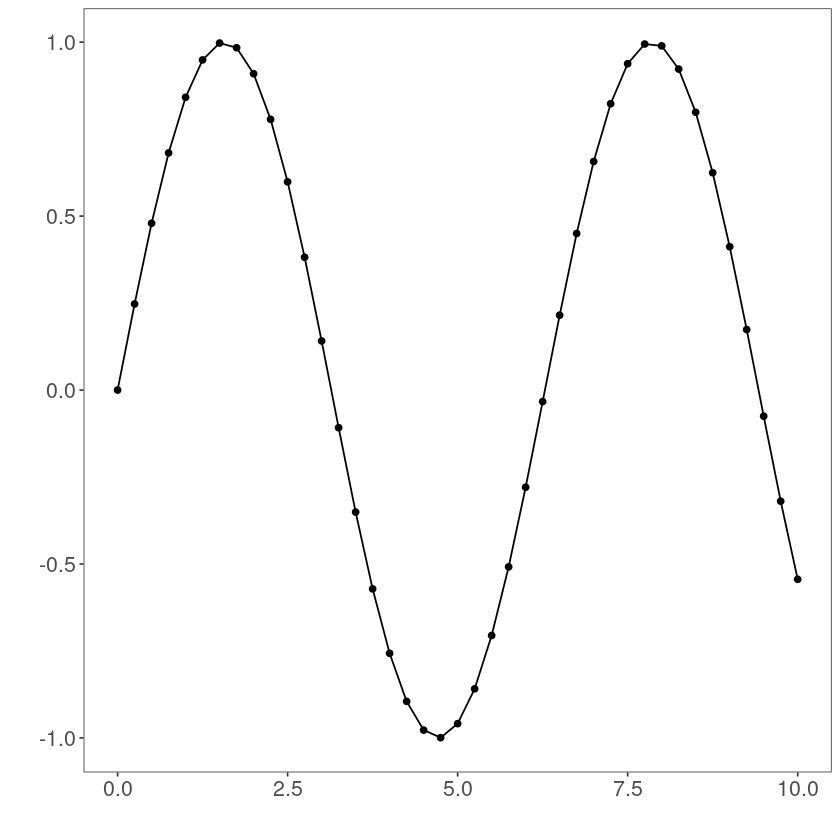

In [2]:
data(sin_data)
library(ggplot2)
plot_ts(x=sin_data$x, y=sin_data$y) + theme(text = element_text(size=16))

### Sliding windows

In [3]:
sw_size <- 10
xw <- ts_data(sin_data$y, sw_size)

### Augment

In [4]:
augment <- ts_aug_stretch()
augment <- fit(augment, xw)
xa <- transform(augment, xw)
idx <- attr(xa, "idx")
ts_head(xa)

t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
0.0000000,0.2474040,0.4794255,0.6816388,0.8414710,0.9489846,0.9974950,0.9839859,0.9092974,0.7780732
0.2474040,0.4794255,0.6816388,0.8414710,0.9489846,0.9974950,0.9839859,0.9092974,0.7780732,0.5984721
0.4794255,0.6816388,0.8414710,0.9489846,0.9974950,0.9839859,0.9092974,0.7780732,0.5984721,0.3816610
0.6816388,0.8414710,0.9489846,0.9974950,0.9839859,0.9092974,0.7780732,0.5984721,0.3816610,0.1411200
0.8414710,0.9489846,0.9974950,0.9839859,0.9092974,0.7780732,0.5984721,0.3816610,0.1411200,-0.1081951
0.9489846,0.9974950,0.9839859,0.9092974,0.7780732,0.5984721,0.3816610,0.1411200,-0.1081951,-0.3507832


### Plot

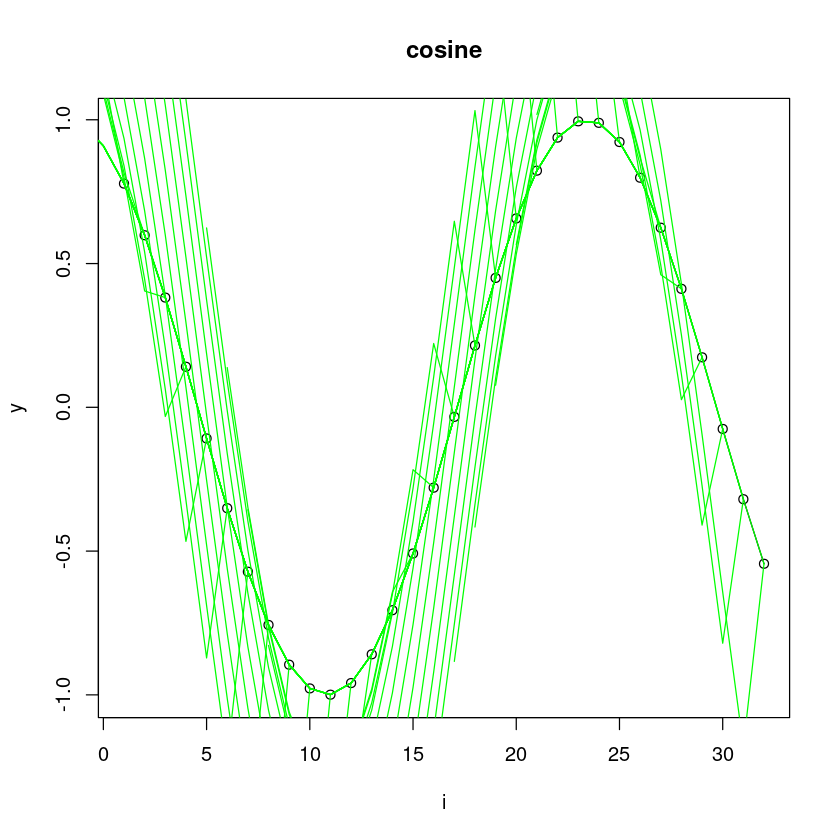

In [5]:
i <- 1:nrow(xw)
y <- xw[,sw_size]
plot(x = i, y = y, main = "cosine")
lines(x = i, y = y, col="black")
for (j in 1:nrow(xa)) {
  lines(x = (idx[j]-sw_size+1):idx[j], y = xa[j,1:sw_size], col="green")
}